In [1]:
%pip install opencv-python scikit-image scipy pillow matplotlib imageio

Note: you may need to restart the kernel to use updated packages.


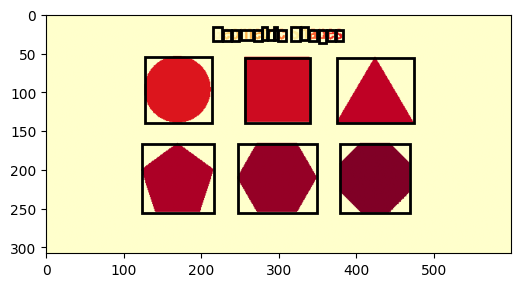

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from skimage.morphology import label
from skimage.measure import regionprops
from skimage.filters import threshold_otsu

# Load ảnh và chuyển sang ảnh xám
data = Image.open('geometric.png').convert('L')
a = np.asarray(data)

# Áp dụng ngưỡng Otsu
thres = threshold_otsu(a)
b = a > thres

# Gán nhãn các vùng
c = label(b)

# Lưu kết quả gán nhãn
plt.imsave('label_output.jpg', c, cmap='viridis')

# Tính toán các đặc trưng
d = regionprops(c)

# Vẽ ảnh với bounding box
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(c, cmap='YlOrRd')

for i in d:
    lr, lc, ur, uc = i.bbox
    rec_width = uc - lc
    rec_height = ur - lr
    rect = mpatches.Rectangle((lc, lr), rec_width, rec_height,
                              fill=False, edgecolor='black', linewidth=2)
    ax.add_patch(rect)

plt.show()